In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
import csv

In [2]:
#Creating dataframe from csv file
cumsum = pd.read_csv('Citation_data/citation_cumsum.csv')
cumsum.drop(columns=['cited_subcategory_id'], inplace=True)
cumsum.head()

,11.0,12.0,13.0,14.0,15.0,19.0,21.0,22.0,23.0,24.0,...,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0
0,34450.0,1820.0,67.0,5264,1761.0,7671.0,75,343,162,31,...,1526,18,2148.0,218.0,139.0,47.0,12.0,144.0,2759,4.0
1,1217.0,118776.0,1222.0,2779,20559.0,41959.0,1810,2728,6407,1578,...,1574,372,774.0,6087.0,1434.0,1253.0,420.0,991.0,34622,2.0
2,75.0,1017.0,69811.0,544,488.0,18330.0,297,564,164,274,...,354,43,104.0,994.0,219.0,1472.0,319.0,361.0,6639,0.0
3,5208.0,4352.0,710.0,145211,25333.0,38513.0,452,918,721,226,...,2347,68,48.0,616.0,52.0,71.0,33.0,84.0,4607,11.0
4,1936.0,24014.0,1073.0,20076,316181.0,57656.0,2351,1074,2768,434,...,1749,4557,816.0,5203.0,592.0,277.0,730.0,1080.0,55051,3.0


In [3]:
#Create dictionary of node weights
node_weights = dict()
row_number = 0
for node in list(cumsum.columns):
    node_weights[node] = cumsum.at[row_number, node]
    row_number += 1
print(node_weights)

{'11.0': 34450.0, '12.0': 118776.0, '13.0': 69811.0, '14.0': 145211, '15.0': 316181.0, '19.0': 1135234.0, '21.0': 2225094, '22.0': 1734424, '23.0': 551711, '24.0': 929755, '25.0': 394138, '31.0': 836285, '32.0': 1903344, '33.0': 38624.0, '39.0': 288466.0, '41.0': 515988.0, '42.0': 311384.0, '43.0': 402288.0, '44.0': 202491, '45.0': 668994, '46.0': 1382027, '49.0': 443767, '51.0': 438593.0, '52.0': 189394.0, '53.0': 443811.0, '54.0': 275165.0, '55.0': 432591, '59.0': 581667.0, '61.0': 210849, '62.0': 340772, '63.0': 159414.0, '64.0': 314926.0, '65.0': 268276.0, '66.0': 99026.0, '67.0': 66433.0, '68.0': 199594.0, '69.0': 894599, '70.0': 0.0}


In [4]:
#Create graph and add nodes
G = nx.MultiDiGraph()
G.clear()
for node in list(cumsum.columns):
    G.add_node(node, weight=node_weights[node])
list(G.nodes(data=True))

[('11.0', {'weight': 34450.0}),
 ('12.0', {'weight': 118776.0}),
 ('13.0', {'weight': 69811.0}),
 ('14.0', {'weight': 145211}),
 ('15.0', {'weight': 316181.0}),
 ('19.0', {'weight': 1135234.0}),
 ('21.0', {'weight': 2225094}),
 ('22.0', {'weight': 1734424}),
 ('23.0', {'weight': 551711}),
 ('24.0', {'weight': 929755}),
 ('25.0', {'weight': 394138}),
 ('31.0', {'weight': 836285}),
 ('32.0', {'weight': 1903344}),
 ('33.0', {'weight': 38624.0}),
 ('39.0', {'weight': 288466.0}),
 ('41.0', {'weight': 515988.0}),
 ('42.0', {'weight': 311384.0}),
 ('43.0', {'weight': 402288.0}),
 ('44.0', {'weight': 202491}),
 ('45.0', {'weight': 668994}),
 ('46.0', {'weight': 1382027}),
 ('49.0', {'weight': 443767}),
 ('51.0', {'weight': 438593.0}),
 ('52.0', {'weight': 189394.0}),
 ('53.0', {'weight': 443811.0}),
 ('54.0', {'weight': 275165.0}),
 ('55.0', {'weight': 432591}),
 ('59.0', {'weight': 581667.0}),
 ('61.0', {'weight': 210849}),
 ('62.0', {'weight': 340772}),
 ('63.0', {'weight': 159414.0}),
 ('64

In [5]:
#Add edges with weights
row_number = 0
for node_1 in list(cumsum.columns):
    for node_2 in list(cumsum.columns):
        if str(node_1) != str(node_2):
            G.add_edge(node_1, node_2, weight=cumsum.at[row_number, node_2])
    row_number += 1

In [6]:
#Customize node and edge sizes according to size of internal and external linkage
row_number = 0
size_list = []
edge_list = []
for node in list(cumsum.columns):
    size_list.append(abs((cumsum.at[row_number, node])**(1/1.8)) + 100)
    row_number += 1
print(size_list)

[431.6352462686089, 759.6198550159143, 590.9856628530362, 837.5262953322688, 1236.37029201124, 2411.725840572819, 3459.732077857485, 3025.4816252509145, 1648.2454118206958, 2168.999045525241, 1384.3799126940746, 2050.72853717227, 3180.4964682656046, 453.3898136084011, 1179.9058825927475, 1591.724654434217, 1226.759618338361, 1399.0674768639537, 987.1625093129306, 1823.2396521847104, 2678.6836755864806, 1471.8553942345181, 1462.946221558033, 954.8110355606362, 1471.930959799614, 1151.9527129526402, 1452.5525746122998, 1694.3985951560367, 1007.3231038515847, 1284.6527237840578, 876.7700593746115, 1233.8622260198174, 1137.238886342664, 696.2333201178716, 577.6416029522851, 980.0885661103304, 2125.1641317640306, 100.0]


In [11]:
#Calculate eigenvector centrality
evc = nx.eigenvector_centrality_numpy(G, weight='node_weights')

#Rank eigenvector centralities
sorted(evc, key=evc.get, reverse=True)
ranked_evc = {key: rank for rank, key in enumerate(sorted(evc, key=evc.get, reverse=True), 1)}

{'11.0': 0.1622214211307625, '12.0': 0.16222142113076254, '13.0': 0.16222142113076254, '14.0': 0.16222142113076257, '15.0': 0.16222142113076254, '19.0': 0.1622214211307625, '21.0': 0.1622214211307626, '22.0': 0.1622214211307625, '23.0': 0.16222142113076257, '24.0': 0.16222142113076252, '25.0': 0.16222142113076254, '31.0': 0.1622214211307626, '32.0': 0.16222142113076252, '33.0': 0.1622214211307625, '39.0': 0.1622214211307625, '41.0': 0.16222142113076254, '42.0': 0.16222142113076257, '43.0': 0.16222142113076246, '44.0': 0.16222142113076257, '45.0': 0.16222142113076252, '46.0': 0.1622214211307625, '49.0': 0.16222142113076254, '51.0': 0.16222142113076252, '52.0': 0.16222142113076252, '53.0': 0.16222142113076257, '54.0': 0.16222142113076254, '55.0': 0.16222142113076257, '59.0': 0.16222142113076254, '61.0': 0.16222142113076254, '62.0': 0.16222142113076252, '63.0': 0.16222142113076257, '64.0': 0.1622214211307626, '65.0': 0.1622214211307626, '66.0': 0.16222142113076254, '67.0': 0.1622214211307

In [26]:
#Read in data
string = 'Citation_data/5_year_citation_snapshot'
csv = '.csv'
year = np.array([1980, 1985, 1990, 1995, 2000, 2005, 2010])

d = {}
for y in year:
    fName = string + str(y) + csv 
    
    #Create a dataframe
    temp = pd.read_csv(fName)
    temp.drop(columns=['cited_subcategory_id'], inplace=True)
    
    #Create dictionary of node weights
    node_weights = dict()
    row_number = 0
    for node in list(temp.columns):
        node_weights[node] = temp.at[row_number, node]
        row_number += 1
    
    #Create graph and add nodes
    G = nx.MultiDiGraph()
    G.clear()
    for node in list(temp.columns):
        G.add_node(node, weight=node_weights[node])
    list(G.nodes(data=True))
    
    #Add edges with weights
    row_number = 0
    for node_1 in list(temp.columns):
        for node_2 in list(temp.columns):
            if str(node_1) != str(node_2):
                G.add_edge(node_1, node_2, weight=temp.at[row_number, node_2])
        row_number += 1
    
    #Customize node and edge sizes according to size of internal and external linkage
    #No modifiers needed since we are calculating actual centralities
    row_number = 0
    size_list = []
    edge_list = []
    for node in list(temp.columns):
        size_list.append(temp.at[row_number, node])
        row_number += 1
    
    #Calculate eigenvector centrality
    name = 'evc' + str(y)
    d[name] = nx.eigenvector_centrality_numpy(G, weight='node_weights')
    
    #Rank eigenvector centralities
    rname = 'ranked_evc' + str(y)
    sorted(d[name], key=d[name].get, reverse=True)
    d[rname] = {key: rank for rank, key in enumerate(sorted(d[name], key=d[name].get, reverse=True), 1)}

<AxesSubplot:>

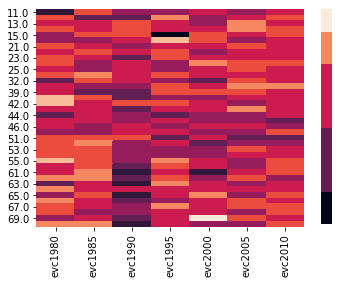

In [31]:
new = pd.DataFrame.from_dict(d)
values = new[['evc1980', 'evc1985','evc1990','evc1995','evc2000','evc2005','evc2010']].copy()
#Finally got Seaborn to work :D
sns.heatmap(values)

<AxesSubplot:>

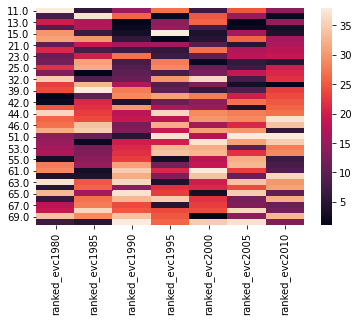

In [32]:
ranked = new[['ranked_evc1980', 'ranked_evc1985','ranked_evc1990','ranked_evc1995','ranked_evc2000','ranked_evc2005','ranked_evc2010']].copy()
sns.heatmap(ranked)